In [1]:
%matplotlib inline

# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import scipy.stats as stats
import seaborn as sns
sns.set()

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
# read 'accepted_2007_to_2018Q2.csv'  dataset as a dataframe
df = pd.read_csv('accepted_2007_to_2018Q2.csv', low_memory =  False)

In [4]:
# display shape of the dataframe
df.shape

(2004126, 151)

In [5]:
# display info of the dataset
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004126 entries, 0 to 2004125
Data columns (total 151 columns):
id                                            2004126 non-null object
member_id                                     1 non-null float64
loan_amnt                                     2004097 non-null float64
funded_amnt                                   2004097 non-null float64
funded_amnt_inv                               2004097 non-null float64
term                                          2004097 non-null object
int_rate                                      2004097 non-null float64
installment                                   2004097 non-null float64
grade                                         2004097 non-null object
sub_grade                                     2004097 non-null object
emp_title                                     1871509 non-null object
emp_length                                    1879278 non-null object
home_ownership                                

In [6]:
#display sample data from the head of the dataset
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Filtered columns which have at least 100,000 empty values
cols = []
for i in  range(0,len(df.columns)):
    if (df.iloc[:,i].notna().sum() <= 100000):
        cols.append(i)

df1 = df.drop(df.columns[cols],1)

In [8]:
# Filtered columns manually which are not useful in this analysis
cols1 = ['emp_title', 'emp_length', 'url', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record',
        'next_pymnt_d', 'mths_since_last_major_derog', 'tot_coll_amt', 'open_acc_6m', 'open_act_il', 'open_il_12m',
         'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'disbursement_method', 'debt_settlement_flag', 'zip_code', 'addr_state']
df2 = df1.drop(cols1, 1)

In [9]:
# Filter  rows which have empty loan amount and then reset index 
rows = []
temp = df2.loan_amnt.isna()
for i in range(0, len(temp)):
    if (temp[i]):
        rows.append(i)
        
df3 = df2.drop(rows, 0)
df3 = df3.reset_index(drop=True)

In [10]:
# Convert data type of grade and sub_grade columns into Categorical data type
print(df3.grade.unique())
print(df3.sub_grade.unique())

['C' 'A' 'D' 'B' 'E' 'F' 'G' '2.0']
['C1' 'A3' 'D1' 'D4' 'C3' 'B5' 'B4' 'C4' 'D5' 'E5' 'B3' 'C5' 'D2' 'E3'
 'C2' 'B2' 'E4' 'A4' 'D3' 'B1' 'A5' 'F1' 'E1' 'E2' 'G2' 'G1' 'F3' 'F2'
 'A1' 'A2' 'G3' 'F4' 'G4' 'F5' 'G5' '3.0']


In [11]:
df3.sub_grade.value_counts()

C1     131885
B5     126571
B4     122532
B3     120025
C2     118865
C3     115796
C4     115522
B1     112032
B2     111766
C5     105405
A5      92656
A4      78140
D1      73241
A1      68650
D2      64872
A3      60465
A2      57734
D3      57552
D4      50697
D5      42944
E1      30713
E2      28105
E3      24733
E4      21064
E5      20106
F1      12773
F2       8945
F3       7546
F4       5962
F5       5004
G1       3875
G2       2617
G3       2062
G4       1695
G5       1546
3.0         1
Name: sub_grade, dtype: int64

In [12]:
df3.grade.value_counts()

B      592926
C      587473
A      357645
D      289306
E      124721
F       40230
G       11795
2.0         1
Name: grade, dtype: int64

In [13]:
for i in range(0, df3.grade.count()):
    if (str(df3.grade[i]) == '2.0'):
        print('grade', i)
    if (df3.sub_grade[i] == '3.0'):
        print('sub_grade', i)

grade 2004062
sub_grade 2004062


In [14]:
# found from above analysis that one row doesn't have the correct category for both 'grade' and 'sub_grade' columns
# Remove that entry
r = []
for i in range(0, df3.grade.count()):
    if (str(df3.grade[i]) == '2.0'):
       r.append(i)
df4 = df3.drop(r, 0)
df4 = df4.reset_index(drop=True)

In [15]:
df4['grade'] = df4['grade'].astype('category')
df4['sub_grade'] = df4['sub_grade'].astype('category')

In [16]:
df4['id'] = df4['id'].astype(float)

In [17]:
df4['issue_d'] = pd.to_datetime(df4['issue_d'], format='%b-%Y')
df4['earliest_cr_line'] = pd.to_datetime(df4['earliest_cr_line'], format='%b-%Y')
df4['last_pymnt_d'] = pd.to_datetime(df4['last_pymnt_d'], format='%b-%Y')
df4['last_credit_pull_d'] = pd.to_datetime(df4['last_credit_pull_d'], format='%b-%Y')

In [18]:
df4.loan_status.unique()
df4['loan_status'] = df4['loan_status'].astype('category')

In [19]:
df4.application_type.unique()


array(['Individual', 'Joint App', nan], dtype=object)

In [20]:
df4['application_type'] = df4['application_type'].astype('category')

In [21]:
#fill empty cells of column 'annual_inc' with median of the column
df4.annual_inc = df4.annual_inc.fillna(df.annual_inc.median())
df4.annual_inc.isnull().sum()

0

In [22]:
# Find outliers and remove them
df4.annual_inc.describe()

count    2.004096e+06
mean     7.754639e+04
std      1.148541e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.200000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [23]:
# remove rows that have 'annual_inc' > 300000 and 'annual_inc' == 0
r = []
for i in range(0, df4.annual_inc.count()):
    if (df4.annual_inc[i] > 300000.0 or df4.annual_inc[i] == 0.0):
       r.append(i)

In [24]:
df5 = df4.drop(r, 0)
df5 = df5.reset_index(drop=True)

In [25]:
df5.annual_inc.describe()

count    1.990206e+06
mean     7.467362e+04
std      4.180165e+04
min      3.600000e-01
25%      4.600000e+04
50%      6.500000e+04
75%      9.136725e+04
max      3.000000e+05
Name: annual_inc, dtype: float64

In [26]:
group = df5.groupby(df5.issue_d.dt.year)
group.agg(np.size)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
issue_d,,,,,,,,,,,,,,,,,,,,,
2007,597.0,597.0,597.0,597.0,597,597.0,597.0,597,597,597,...,597.0,597.0,597.0,597.0,597.0,597.0,597.0,597.0,597.0,597
2008,2382.0,2382.0,2382.0,2382.0,2382,2382.0,2382.0,2382,2382,2382,...,2382.0,2382.0,2382.0,2382.0,2382.0,2382.0,2382.0,2382.0,2382.0,2382
2009,5249.0,5249.0,5249.0,5249.0,5249,5249.0,5249.0,5249,5249,5249,...,5249.0,5249.0,5249.0,5249.0,5249.0,5249.0,5249.0,5249.0,5249.0,5249
2010,12462.0,12462.0,12462.0,12462.0,12462,12462.0,12462.0,12462,12462,12462,...,12462.0,12462.0,12462.0,12462.0,12462.0,12462.0,12462.0,12462.0,12462.0,12462
2011,21642.0,21642.0,21642.0,21642.0,21642,21642.0,21642.0,21642,21642,21642,...,21642.0,21642.0,21642.0,21642.0,21642.0,21642.0,21642.0,21642.0,21642.0,21642
2012,53181.0,53181.0,53181.0,53181.0,53181,53181.0,53181.0,53181,53181,53181,...,53181.0,53181.0,53181.0,53181.0,53181.0,53181.0,53181.0,53181.0,53181.0,53181
2013,134324.0,134324.0,134324.0,134324.0,134324,134324.0,134324.0,134324,134324,134324,...,134324.0,134324.0,134324.0,134324.0,134324.0,134324.0,134324.0,134324.0,134324.0,134324
2014,234488.0,234488.0,234488.0,234488.0,234488,234488.0,234488.0,234488,234488,234488,...,234488.0,234488.0,234488.0,234488.0,234488.0,234488.0,234488.0,234488.0,234488.0,234488
2015,418616.0,418616.0,418616.0,418616.0,418616,418616.0,418616.0,418616,418616,418616,...,418616.0,418616.0,418616.0,418616.0,418616.0,418616.0,418616.0,418616.0,418616.0,418616


In [27]:
#missing_fractions = df5.isnull().mean().sort_values(ascending=False)
#drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

###### For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. These include features in the loan application, and any features added by LendingClub when the loan listing was accepted, such as the loan grade and interest rate.  I am using my best available knowledge to determine which loan features are  known to potential investors. 

In [28]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'installment', 'int_rate', 'loan_amnt', 'loan_status', 
             'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'term', 'title', 
             'total_acc', 'verification_status', 'zip_code', 'issue_d','revol_bal','revol_util','inq_last_6mths']

In [29]:
drop_list = [col for col in df5.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'earliest_cr_line', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', '

In [30]:
df5.drop(labels=drop_list, axis=1, inplace=True)

In [31]:
# Convert term into integer type
df5['term'] = df5['term'].apply(lambda s: np.int8(s.split()[0]))
df5['term'].value_counts()

36    1422140
60     568066
Name: term, dtype: int64

In [32]:
print(df5['grade'].unique())
print(df5['sub_grade'].unique())
# The grade  and sub_grade provide similar information so drop the sub_grade column.
df5.drop('sub_grade', axis=1, inplace=True)

[C, A, D, B, E, F, G]
Categories (7, object): [C, A, D, B, E, F, G]
[C1, A3, D1, D4, C3, ..., G3, F4, G4, F5, G5]
Length: 35
Categories (35, object): [C1, A3, D1, D4, ..., F4, G4, F5, G5]


In [33]:
#FICO score
#Check the Pearson correlation between these values:
df5[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [34]:
# We only need to keep one of the FICO scores. We'll take the average of the two and call it fico_score:
df5['fico_score'] = 0.5*df5['fico_range_low'] + 0.5*df5['fico_range_high']
df5.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

###### Convert loan status to 0/1 default indicator
    Change the response variable loan_status to a 0/1 variable, where 0 indicates fully paid and 1 indicates default. Since actual number of defaults are really small, used charged off status as an indicator of default. Called this column Default because it makes more sense for our analysis.

In [35]:
df5.loan_status.value_counts()

Current                                                1099582
Fully Paid                                              669286
Charged Off                                             170240
Late (31-120 days)                                       27535
In Grace Period                                          13667
Late (16-30 days)                                         7104
Does not meet the credit policy. Status:Fully Paid        1969
Does not meet the credit policy. Status:Charged Off        752
Default                                                     71
Name: loan_status, dtype: int64

In [36]:
df_temp1 = df5[(df5.loan_status == 'Fully Paid')]
df_temp2 = df5[(df5.loan_status == 'Current')]
df_temp3 = df5[(df5.loan_status == 'Default')]
df_temp4 = df5[(df5.loan_status == 'Charged Off')]

df6 = pd.concat([df_temp1, df_temp2, df_temp3, df_temp4])
df6.reset_index(drop=True, inplace = True)

df6['loan_status'] = df6['loan_status'].replace({'Current':0, 'Fully Paid':0, 'Default':1, 'Charged Off':1})
df6['default'] = df6['loan_status'].astype('int')
df6.drop(['loan_status'], axis=1, inplace=True)


In [37]:
df6.dropna(axis = 0, inplace = True)

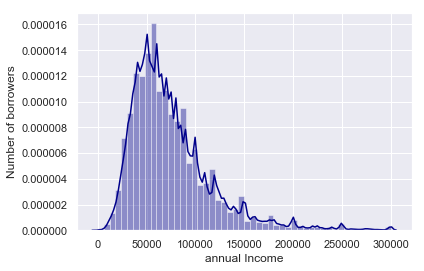

In [38]:
# Draw the histogram of annual income

sns.distplot(df6['annual_inc'], hist=True, kde=True, bins=50, color = 'darkblue')

plt.xlabel('annual Income')
plt.ylabel('Number of borrowers')
plt.show()

In [39]:
# Dataset is ready for further EDA and Data Modelling. Saved the dataset as clean_loan.csv.
df6.to_csv("clean_loan.csv")